### 1. Import modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import shap
from sklearn import tree

### 2. Import .pkl's

In [2]:
# Load data
X_schoolgaanden_numericals = pd.read_pickle('4_Data/Pickles/X_schoolgaanden_numericals.pkl')
X_schoolgaanden_booleans = pd.read_pickle('4_Data/Pickles/X_schoolgaanden_booleans.pkl')
y_schoolgaanden = np.load('4_Data/Arrays/y_schoolgaanden.npy')

# Merge data
X_schoolgaanden = pd.concat([X_schoolgaanden_numericals, X_schoolgaanden_booleans], axis=1)

### 3. Supervised ML for explainability

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_schoolgaanden, y_schoolgaanden, test_size=0.3, random_state=42)

In [4]:
shap.initjs()

In [5]:
# Initialize the Random Forest Classifier
clf_rf = RandomForestClassifier(random_state=42)

# Train the classifier
clf_rf.fit(X_train, y_train)

# Make predictions
y_pred = clf_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.63      0.71       738
           1       0.92      0.97      0.95      3477

    accuracy                           0.91      4215
   macro avg       0.86      0.80      0.83      4215
weighted avg       0.90      0.91      0.90      4215

Confusion Matrix:
[[ 464  274]
 [ 114 3363]]


In [6]:
# Create a SHAP explainer
explainer = shap.TreeExplainer(clf_rf)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train)

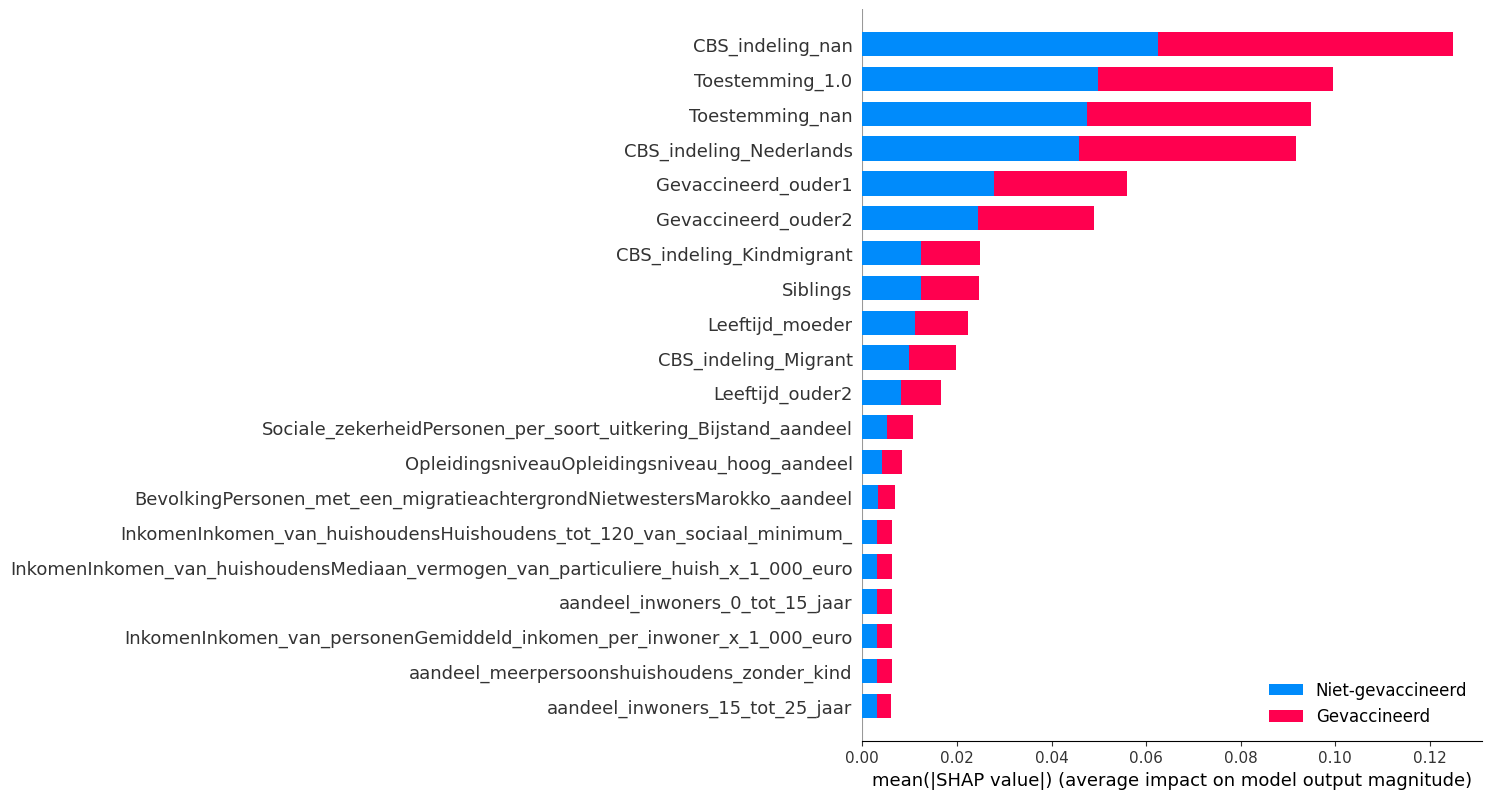

In [7]:
# Split the array into a list of arrays, one for each class
multi_shap_vals = [shap_values[:, :, i] for i in range(shap_values.shape[2])]

# Plot the SHAP values with feature names
shap.summary_plot(multi_shap_vals, X_train.values, plot_type='bar', class_names=['Niet-gevaccineerd', 'Gevaccineerd'], feature_names=X_train.columns)

In [8]:
# Print summary plot per cluster
for cluster in range(len(np.unique(y_schoolgaanden))):
    shap.summary_plot(shap_values[:, :, cluster], X_train, feature_names=X_train.columns, plot_size=(15, 10), show=False, max_display=15)
    plt.title(f'Status: {cluster}')
    # Save the plot
    plt.savefig(f'9_Results/Schoolgaanden/SHAP_plot_status_{cluster}.jpg', dpi=300, bbox_inches='tight')
    plt.close()